Цель: провести анализ датасета iris, используя критерий t-Стьюдента, а именно, сравнить числовую переменную(согласно варианту) по двум уровням номинативной переменной.
Описание данных
sepal_length –длина чашелистика
sepal_width-ширина чашелистика
petal.length – длина лепестка
petal.width – ширина лепестка
class– вид растения

In [2]:
import pandas as pd 
import scipy

In [3]:
df = pd.read_csv('iris_1.csv')

In [4]:
df = df[['petal_width', 'petal_length', 'class']]

In [5]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df = df.query("`class` == 'Iris-virginica' or `class` == 'Iris-versicolor'")
df


,petal_width,petal_length,class
50,1.4,4.7,Iris-versicolor
51,1.5,4.5,Iris-versicolor
52,1.5,4.9,Iris-versicolor
53,1.3,4.0,Iris-versicolor
54,1.5,4.6,Iris-versicolor
...,...,...,...
145,2.3,5.2,Iris-virginica
146,1.9,5.0,Iris-virginica
147,2.0,5.2,Iris-virginica
148,2.3,5.4,Iris-virginica


In [7]:
import matplotlib.pyplot as plt


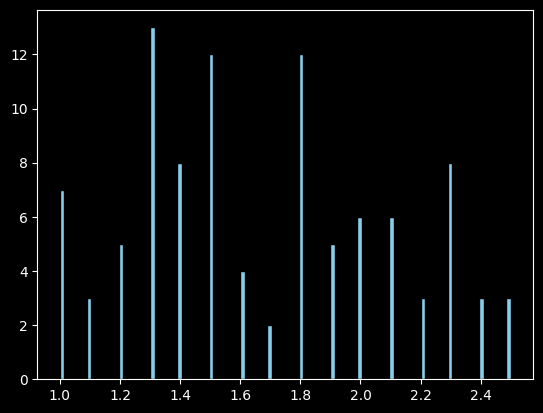

In [8]:
plt.hist(
    df['petal_width'],
    bins=len(df['petal_width']),
    color='skyblue', 
    edgecolor='black'
)
plt.show()

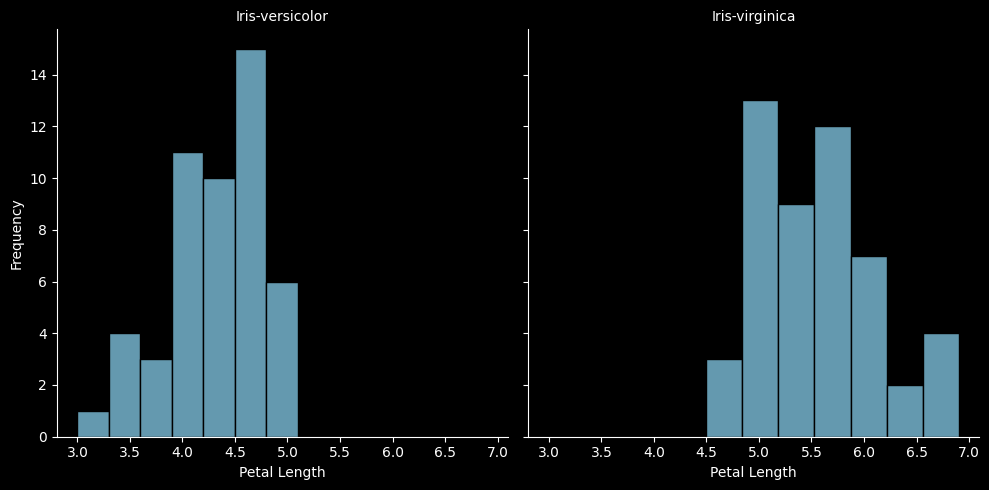

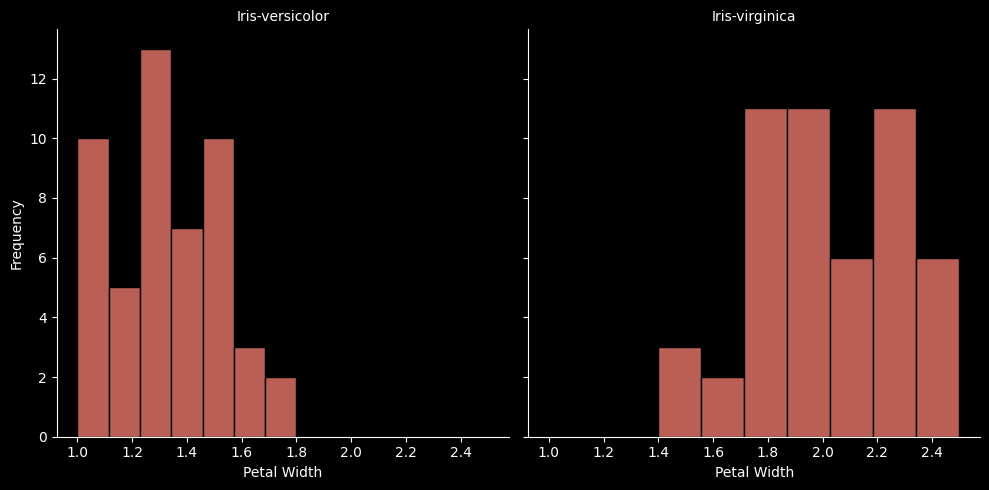

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# FacetGrid for petal_length
g1 = sns.FacetGrid(df, col='class', height=5, aspect=1)
g1.map_dataframe(sns.histplot, x='petal_length', bins='auto', color='skyblue', edgecolor='black')
g1.set_axis_labels('Petal Length', 'Frequency')
g1.set_titles('{col_name}')
plt.tight_layout()
plt.show()

# FacetGrid for petal_width
g2 = sns.FacetGrid(df, col='class', height=5, aspect=1)
g2.map_dataframe(sns.histplot, x='petal_width', bins='auto', color='salmon', edgecolor='black')
g2.set_axis_labels('Petal Width', 'Frequency')
g2.set_titles('{col_name}')
plt.tight_layout()
plt.show()

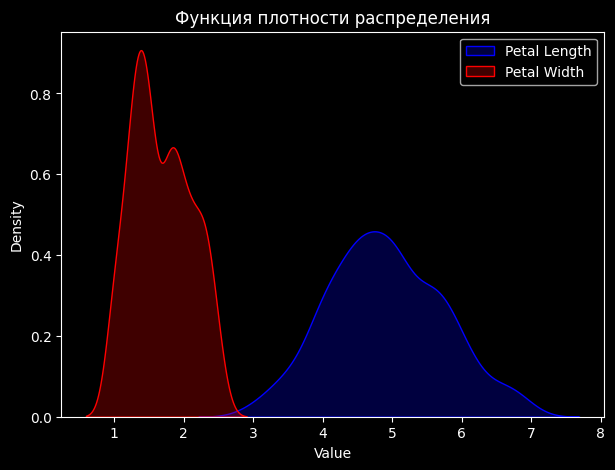

In [11]:
plt.figure(figsize=(7,5))

sns.kdeplot(df['petal_length'], fill=True, color='blue', bw_adjust=0.8, label='Petal Length')
sns.kdeplot(df['petal_width'], fill=True, color='red', bw_adjust=0.8, label='Petal Width')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Функция плотности распределения')
plt.legend()
plt.show()

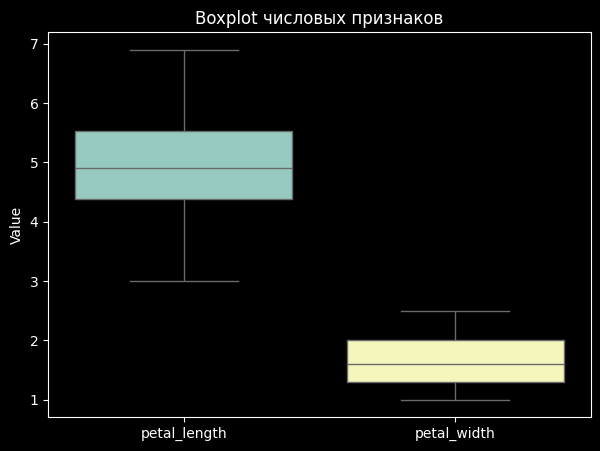

In [12]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df[['petal_length', 'petal_width']])
plt.ylabel('Value')
plt.title('Boxplot числовых признаков')
plt.show()

In [13]:
from scipy.stats import shapiro

stat, p_value = shapiro(df['petal_length'])
print(f"Shapiro-Wilk Test for Petal Length: Statistic={stat:.4f}, p-value={p_value:.4f}")

stat, p_value = shapiro(df['petal_width'])
print(f"Shapiro-Wilk Test for Petal Width: Statistic={stat:.4f}, p-value={p_value:.4f}")

Shapiro-Wilk Test for Petal Length: Statistic=0.9910, p-value=0.7445
Shapiro-Wilk Test for Petal Width: Statistic=0.9516, p-value=0.0011


In [14]:
from scipy.stats import bartlett

stat, p_value = bartlett(df['petal_length'], df['petal_width'])
print(f"Bartlett's Test: Statistic={stat:.4f}, p-value={p_value:.4f}")

Bartlett's Test: Statistic=40.6311, p-value=0.0000


In [15]:
from scipy.stats import ttest_ind

# T-тест для независимых выборок
stat, p_value = ttest_ind(df['petal_length'], df['petal_width'], equal_var=False)  # unequal variance (Welch's test)
print(f"T-test (independent samples): Statistic={stat:.4f}, p-value={p_value:.4f}")

T-test (independent samples): Statistic=34.7894, p-value=0.0000


In [16]:
from scipy.stats import ttest_rel

# T-тест для зависимых выборок
stat, p_value = ttest_rel(df['petal_length'], df['petal_width'])
print(f"T-test (paired samples): Statistic={stat:.4f}, p-value={p_value:.4f}")

T-test (paired samples): Statistic=60.5517, p-value=0.0000
